<a href="https://colab.research.google.com/github/priyansuapk/ml-lab-exam/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

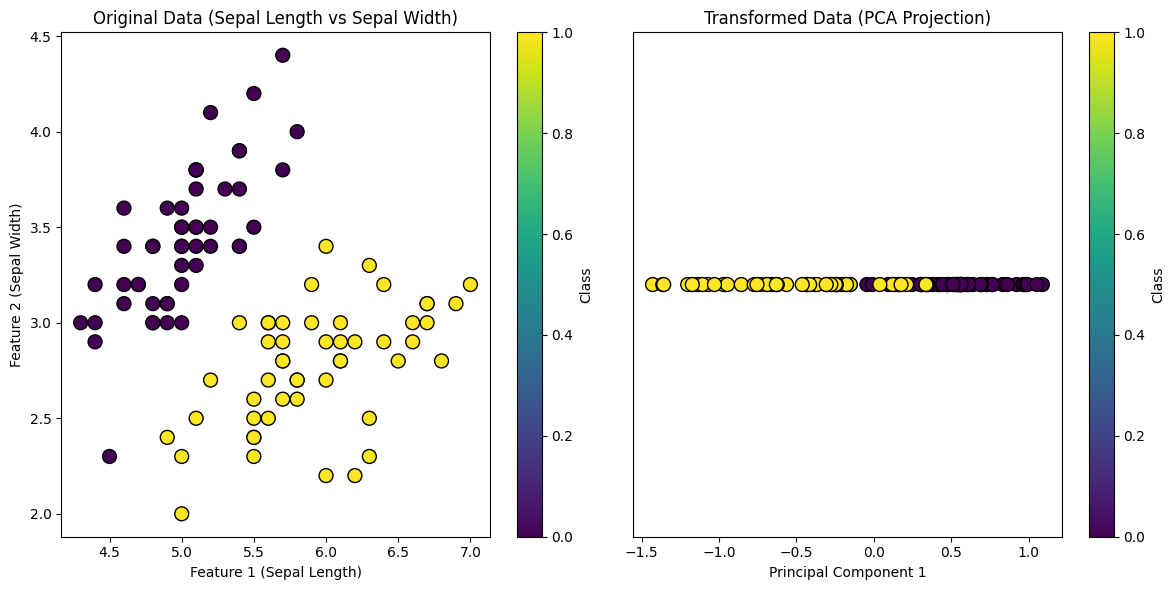

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select two features (e.g., Sepal Length and Sepal Width) and two classes (e.g., Class 0 and 1)
X = X[y < 2, :2]  # Selecting classes 0 and 1, and the first two features

# PCA Implementation from Scratch
class PCAScratch:
    def __init__(self):
        self.mean = None
        self.components = None

    def fit(self, X):
        # Step 1: Mean centering the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Step 4: Sort eigenvectors by eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_indices]

    def transform(self, X):
        # Step 5: Project the data onto the principal components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

# Apply PCA from scratch
pca = PCAScratch()
pca.fit(X)
X_transformed = pca.transform(X)

# Plotting Original Data with PCA components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y[:len(X)], cmap='viridis', edgecolor='k', s=100)
plt.title("Original Data (Sepal Length vs Sepal Width)")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.colorbar(label="Class")

# Plotting Transformed Data (after PCA)
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], np.zeros_like(X_transformed[:, 0]), c=y[:len(X)], cmap='viridis', edgecolor='k', s=100)
plt.title("Transformed Data (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.yticks([])
plt.colorbar(label="Class")

plt.tight_layout()
plt.show()
